# Logistic Regression

In this exercise, you will implement logistic regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline

<a name="2"></a>
## 2 - Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

<a name="2.1"></a>
### 2.1 Problem Statement

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.
* You have historical data from previous applicants that you can use as a training set for logistic regression.
* For each training example, you have the applicant’s scores on two exams and the admissions decision.
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

<a name="2.2"></a>
### 2.2 Loading and visualizing the data

You will start by loading the dataset for this task.
- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train`
  - `X_train` contains exam scores on two exams for a student
  - `y_train` is the admission decision
      - `y_train = 1` if the student was admitted
      - `y_train = 0` if the student was not admitted
  - Both `X_train` and `y_train` are numpy arrays.


**SYNTHETIC DATA GENERATION**

In [2]:
#Simply run cell,Do not alter code

# Create dataset
def create_dataset():
    data = np.array([
        [34.62365962451697,78.0246928153624,0],
        [30.28671076822607,43.89499752400101,0],
        [35.84740876993872,72.90219802708364,0],
        [60.18259938620976,86.30855209546826,1],
        [79.0327360507101,75.3443764369103,1],
        [45.08327747668339,56.3163717815305,0],
        [61.10666453684766,96.51142588489624,1],
        [75.02474556738889,46.55401354116538,1],
        [76.09878670226257,87.42056971926803,1],
        [84.43281996120035,43.53339331072109,1],
        [95.86155507093572,38.22527805795094,0],
        [75.01365838958247,30.60326323428011,0],
        [82.30705337399482,76.48196330235604,1],
        [69.36458875970939,97.71869196188608,1],
        [39.53833914367223,76.03681085115882,0],
        [53.9710521485623,89.20735013750205,1],
        [69.07014406283025,52.74046973016765,1],
        [67.94685547711617,46.67857410673128,0],
        [70.66150955499435,92.92713789364831,1],
        [76.97878372747498,47.57596364975532,1],
        [67.37202754570876,42.83843832029179,0],
        [89.67677575072079,65.79936592745237,1],
        [50.534788289883,48.85581152764205,0],
        [34.21206097786789,44.20952859866288,0],
        [77.9240914545704,68.9723599933059,1],
        [62.27101367004632,69.95445795447587,1],
        [80.1901807509566,44.82162893218353,1],
        [93.114388797442,38.80067033713209,0],
        [61.83020602312595,50.25610789244621,0],
        [38.78580379679423,64.99568095539578,0],
        [61.379289447425,72.80788731317097,1],
        [85.40451939411645,57.05198397627122,1],
        [52.10797973193984,63.12762376881715,0],
        [52.04540476831827,69.43286012045222,1],
        [40.23689373545111,71.16774802184875,0],
        [54.63510555424817,52.21388588061123,0],
        [33.91550010906887,98.86943574220611,0],
        [64.17698887494485,80.90806058670817,1],
        [74.78925295941542,41.57341522824434,0],
        [34.1836400264419,75.2377203360134,0],
        [83.90239366249155,56.30804621605327,1],
        [51.54772026906181,46.85629026349976,0],
        [94.44336776917852,65.56892160559052,1],
        [82.36875375713919,40.61825515970618,0],
        [51.04775177128865,45.82270145776001,0],
        [62.22267576120188,52.06099194836679,0],
        [77.19303492601364,70.45820000180959,1],
        [97.77159928000232,86.7278223300282,1],
        [62.07306379667647,96.76882412413983,1],
        [91.56497449807442,88.69629254546599,1],
        [79.94481794066932,74.16311935043758,1],
        [99.2725269292572,60.99903099844988,1],
        [90.54671411399852,43.39060180650027,1],
        [34.52451385320009,60.39634245837173,0],
        [50.2864961189907,49.80453881323059,0],
        [49.58667721632031,59.80895099453265,0],
        [97.64563396007767,68.86157272420604,1],
        [32.57720016809309,95.59854761387875,0],
        [74.24869136721598,69.82457122657193,1],
        [71.79646205863379,78.45356224515052,1],
        [75.3956114656803,85.75993667331619,1],
        [35.28611281526193,47.02051394723416,0],
        [56.25381749711624,39.26147251058019,0],
        [30.05882244669796,49.59297386723685,0],
        [44.66826172480893,66.45008614558913,0],
        [66.56089447242954,41.09209807936973,0],
        [40.45755098375164,97.53518548909936,1],
        [49.07256321908844,51.88321182073966,0],
        [80.27957401466998,92.11606081344084,1],
        [66.74671856944039,60.99139402740988,1],
        [32.72283304060323,43.30717306430063,0],
        [64.0393204150601,78.03168802018232,1],
        [72.34649422579923,96.22759296761404,1],
        [60.45788573918959,73.09499809758037,1],
        [58.84095621726802,75.85844831279042,1],
        [99.82785779692128,72.36925193383885,1],
        [47.26426910848174,88.47586499559782,1],
        [50.45815980285988,75.80985952982456,1],
        [60.45555629271532,42.50840943572217,0],
        [82.22666157785568,42.71987853716458,0],
        [88.9138964166533,69.80378889835472,1],
        [94.83450672430196,45.69430680250754,1],
        [67.31925746917527,66.58935317747915,1],
        [57.23870631569862,59.51428198012956,1],
        [80.36675600171273,90.96014789746954,1],
        [68.46852178591112,85.59430710452014,1],
        [42.0754545384731,78.84478600148043,0],
        [75.47770200533905,90.42453899753964,1],
        [78.63542434898018,96.64742716885644,1],
        [52.34800398794107,60.76950525602592,0],
        [94.09433112516793,77.15910509073893,1],
        [90.44855097096364,87.50879176484702,1],
        [55.48216114069585,35.57070347228866,0],
        [74.49269241843041,84.84513684930135,1],
        [89.84580670720979,45.35828361091658,1],
        [83.48916274498238,48.38028579728175,1],
        [42.2617008099817,87.10385094025457,1],
        [99.31500880510394,68.77540947206617,1],
        [55.34001756003703,64.9319380069486,1],
        [74.77589300092767,89.52981289513276,1]
    ])
    X = data[:, :2]
    y = data[:, 2]
    return X, y


X_train, y_train = create_dataset()

#### View the variables
Let's get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

The code below prints the first five values of `X_train` and the type of the variable.

In [3]:
# Print the first five elements of X_train
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:", type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


Now print the first five values of `y_train`

In [4]:
# Print the first five elements of y_train
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:", type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions. Let's print the shape of `X_train` and `y_train` and see how many training examples we have in our dataset.

In [5]:
# Print the dimensions of the variables
print('The shape of X_train is: ' + str(X_train.shape))
print('The shape of y_train is: ' + str(y_train.shape))
print('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


#### Visualize your data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
- The code below displays the data on a 2D plot (as shown below), where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

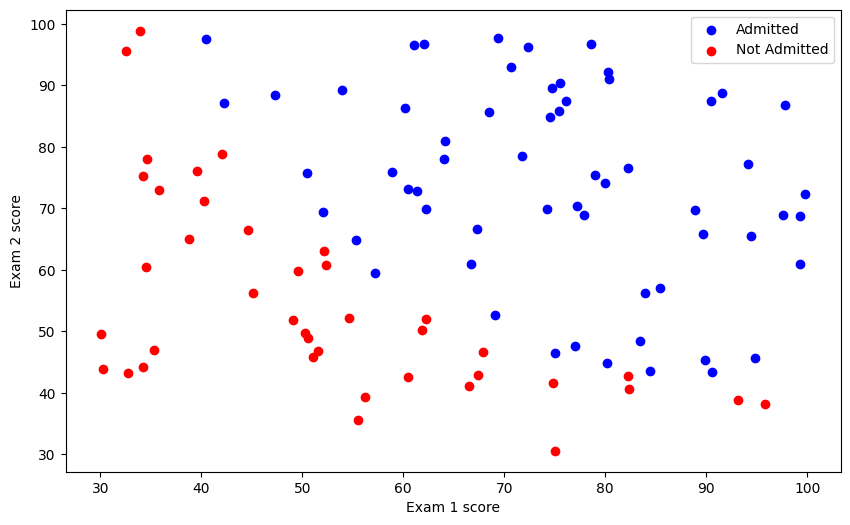

In [6]:
# Visualize the data
def plot_data(X, y):
    admitted = X[y == 1]
    not_admitted = X[y == 0]
    plt.figure(figsize=(10, 6))
    plt.scatter(admitted[:, 0], admitted[:, 1], c='b', label='Admitted')
    plt.scatter(not_admitted[:, 0], not_admitted[:, 1], c='r', label='Not Admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.show()

plot_data(X_train, y_train)

Your goal is to build a logistic regression model to fit this data.
- With this model, you can then predict if a new student will be admitted based on their scores on the two exams.

<a name="2.3"></a>
### 2.3  Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.

<a name='ex-01'></a>
### Exercise 1
Please complete  the `sigmoid` function to calculate

$$g(z) = \frac{1}{1+e^{-z}}$$

Note that
- `z` is not always a single number, but can also be an array of numbers.
- If the input is an array of numbers, we'd like to apply the sigmoid function to each value in the input array.

In [7]:
# GRADED FUNCTION 1: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    ### START CODE HERE ###
    g = #Your code here
    ### END SOLUTION ###

    return g

When you are finished, try testing a few values by calling `sigmoid(x)` in the cell below.
- For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0.
- Evaluating `sigmoid(0)` should give you exactly 0.5.


In [ ]:
print ("sigmoid(0) = " + str(sigmoid(0)))

**Expected Output**:
<table>
  <tr>
    <td> <b>sigmoid(0)<b></td>
    <td> 0.5 </td>
  </tr>
</table>
    
- As mentioned before, your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

**TEST FUNCTION**

In [ ]:
#Simply run this cell,Dont alter Code
#Test function
import numpy as np

def sigmoid_test(sigmoid_func):
    test_cases = [
        {
            "input": np.array([-1, 0, 1, 2]),
            "expected": np.array([0.26894142, 0.5, 0.73105858, 0.88079708])
        },
        {
            "input": np.array([[1, 2], [3, 4]]),
            "expected": np.array([[0.73105858, 0.88079708],
                                  [0.95257413, 0.98201379]])
        },
        {
            "input": 0,
            "expected": 0.5
        }
    ]

    for i, test_case in enumerate(test_cases, 1):
        input_data = test_case["input"]
        expected_output = test_case["expected"]

        print(f"\nTest case {i}:")
        print(f"Input:")
        print(input_data)
        print(f"Expected Output:")
        print(expected_output)

        actual_output = sigmoid_func(input_data)
        print(f"Actual Output:")
        print(actual_output)

        if isinstance(input_data, (int, float)):
            assert np.isclose(actual_output, expected_output), f"Test case {i} failed"
        else:
            assert np.allclose(actual_output, expected_output), f"Test case {i} failed"

    print("\nAll tests passed!")

sigmoid_test(sigmoid)

**Expected Output**:


```
Test case 1:
Input:
[-1  0  1  2]
Expected Output:
[0.26894142 0.5        0.73105858 0.88079708]

Test case 2:
Input:
[[1 2]
 [3 4]]
Expected Output:
[[0.73105858 0.88079708]
 [0.95257413 0.98201379]]


Test case 3:
Input:
0
Expected Output:
0.5
```



<a name="2.4"></a>
### 2.4 Cost function for logistic regression

In this section, you will implement the cost function for logistic regression.

<a name='ex-02'></a>
### Exercise 2

Please complete the `compute_cost` function using the equations below.

Recall that for logistic regression, the cost function is of the form

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is -

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Note:
* As you are doing this, remember that the variables `X_train` and `y_train` are not scalar values but matrices of shape ($m, n$) and ($𝑚$,1) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.

In [10]:
# GRADED FUNCTION 2: compute_cost
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value
      w : (array_like Shape (n,)) Values of parameters of the model
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost
    """

    m, n = X.shape

    ### START CODE HERE ###
    cost_sum = 0
    for i in range(m):
        z = # Your code here to calculate w[j] * X[i][j]
        f_wb = # Your code here to calculate prediction f_wb for a training example
        cost = # Your code here to calculate loss for a training example
        cost_sum+=cost
    total_cost = cost_sum/m

    ### END CODE HERE ###

    return total_cost

Run the cells below to check your implementation of the `compute_cost` function with two different initializations of the parameters $w$

In [ ]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w (zeros)<b></td>
    <td> 0.693 </td>
  </tr>
</table>

**TEST FUNCTION**

In [ ]:
#Simply run this cell,Do not alter this
#Test Function
def compute_cost_test(compute_cost):
    def run_test_case(X, y, w, b, expected_cost, case_num):
        print(f"\nTest Case {case_num}:")
        print("Input:")
        print(f"X = \n{X}")
        print(f"y = {y}")
        print(f"w = {w}")
        print(f"b = {b}")
        print(f"Expected Output: {expected_cost}")

        result = compute_cost(X, y, w, b)
        print(f"Actual Output: {result}")

        assert np.isclose(result, expected_cost, rtol=1e-6), f"Test case {case_num} failed. Expected {expected_cost}, but got {result}"

    # Test Case 1
    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    expected_cost = 2.15510667
    run_test_case(X, y, w, b, expected_cost, 2)

    # Test Case 2
    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0
    expected_cost = 0.80709376
    run_test_case(X, y, w, b, expected_cost, 3)

    # Test Case 3
    X = np.random.randn(4, 3)
    y = np.array([1, 0, 1, 0])
    w = np.random.randn(3)
    b = 3
    expected_cost = 0.4529660647
    run_test_case(X, y, w, b, expected_cost, 4)

    print('\nAll tests passed!')

# Run the test
compute_cost_test(compute_cost)

**EXPECTED OUTPUT**



```
Test Case 2:
Input:
X =
[[ 0.27626589 -1.85462808]
 [ 0.62390111  1.14531129]
 [ 1.03719047  1.88663893]
 [-0.11169829 -0.36210134]
 [ 0.14867505 -0.43778315]]
y = [1 0 0 1 1]
w = [2.171257   1.15231025]
b = 0
Expected Output: 2.15510667


Test Case 3:
Input:
X =
[[-1.81881234 -0.13804934  0.53983961]
 [-1.77528229  1.31487654 -0.47344805]
 [-1.0922299  -0.25002744 -0.9822943 ]
 [ 1.03126909  0.49133378 -0.4466466 ]]
y = [1 1 0 0]
w = [-0.80636008  0.13126776 -1.21256024]
b = 0
Expected Output: 0.80709376


Test Case 4:
Input:
X =
[[ 0.15999085 -0.75522304  0.34989599]
 [ 0.97754176 -0.13858525  0.10385631]
 [ 0.30059104  0.9682053   0.86962384]
 [ 0.56778309  0.46528234 -1.16537308]]
y = [1 0 1 0]
w = [-2.03599479 -1.15541329  3.34515739]
b = 3
Expected Output: 0.4529660647
```



<a name="2.5"></a>
### 2.5 Gradient for logistic regression

In this section, you will implement the gradient for logistic regression.

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously


<a name='ex-03'></a>
### Exercise 3

Please complete the `compute_gradient` function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.

In [13]:
# GRADED FUNCTION 3: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None):
    """
    Computes the gradient for logistic regression

    Args:
      X : (ndarray Shape (m,n)) variable such as house size
      y : (array_like Shape (m,1)) actual value
      w : (array_like Shape (n,1)) values of parameters of the model
      b : (scalar)                 value of parameter of the model
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w.
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ###
    for i in range(m):
       # Calculate f_wb (exactly as you did in the compute_cost function above)
        f_wb_i = # Your code here

        err_i  = # Your code here to calculate the error

        # get dj_dw for each attribute
        for j in range(n):
          # You code here to calculate the gradient from the i-th example for j-th attribute
            dj_dw[j] = # Your code here
        dj_db = dj_db + err_i

    # divide dj_db and dj_dw by total number of examples
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    ### END CODE HERE ###


    return dj_db, dj_dw

Run the cells below to check your implementation of the `compute_gradient` function with two different initializations of the parameters $w$

In [ ]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db at initial w (zeros)<b></td>
    <td> -0.1 </td>
  </tr>
  <tr>
    <td> <b>ddj_dw at initial w (zeros):<b></td>
    <td> [-12.00921658929115, -11.262842205513591] </td>
  </tr>
</table>

**TEST FUNCTION**

In [ ]:
#Simply run this cell,Do not alter this code
#Test Function
def compute_gradient_test(compute_gradient):
    def run_test_case(X, y, w, b, expected_dj_db, expected_dj_dw, case_num):
        print(f"\nTest Case {case_num}:")
        print("Input:")
        print(f"X = \n{X}")
        print(f"y = {y}")
        print(f"w = {w}")
        print(f"b = {b}")
        print(f"Expected Output:")
        print(f"dj_db = {expected_dj_db}")
        print(f"dj_dw = {expected_dj_dw}")

        dj_db, dj_dw = compute_gradient(X, y, w, b)
        print("Actual Output:")
        print(f"dj_db = {dj_db}")
        print(f"dj_dw = {dj_dw}")

        assert np.isclose(dj_db, expected_dj_db, rtol=1e-6), f"Test case {case_num} failed for dj_db. Expected {expected_dj_db}, but got {dj_db}"
        assert dj_dw.shape == expected_dj_dw.shape, f"Test case {case_num} failed. Wrong shape for dj_dw. Expected: {expected_dj_dw.shape} got: {dj_dw.shape}"
        assert np.allclose(dj_dw, expected_dj_dw, rtol=1e-6), f"Test case {case_num} failed for dj_dw. Expected {expected_dj_dw}, but got {dj_dw}"

    # Test Case
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    w = np.array([1, 0.5, -0.35])
    b = 1.7
    expected_dj_db = 0.28936094
    expected_dj_dw = np.array([-0.11999166, 0.41498775, -0.71968405])
    run_test_case(X, y, w, b, expected_dj_db, expected_dj_dw, 1)

compute_gradient_test(compute_gradient)

<a name="2.7"></a>
### 2.7 Evaluating logistic regression

We can evaluate the quality of the parameters we have found by seeing how well the learned model predicts on our training set.

You will implement the `predict` function below to do this.


<a name='ex-04'></a>
### Exercise 4

Please complete the `predict` function to produce `1` or `0` predictions given a dataset and a learned parameter vector $w$ and $b$.
- First you need to compute the prediction from the model $f(x^{(i)}) = g(w \cdot x^{(i)})$ for every example
    - You've implemented this before in the parts above
- We interpret the output of the model ($f(x^{(i)})$) as the probability that $y^{(i)}=1$ given $x^{(i)}$ and parameterized by $w$.
- Therefore, to get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, you can use the following heuristic -

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$
    
If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [16]:
# GRADED FUNCTION 4: predict

def predict(X, w, b):
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w

    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    ### START CODE HERE ###
    # Loop over each example
    for i in range(m):

        # Calculate f_wb (exactly how you did it in the compute_cost function above)
        # using a couple of lines of code
        f_wb = # Your code here

        # Apply the threshold
        # Calculate the prediction for that training example
        p[i] = # Your code here to calculate the prediction based on f_wb

    ### END CODE HERE ###
    return p

Once you have completed the function `predict`, let's run the code below to report the training accuracy of your classifier by computing the percentage of examples it got correct.

**TEST FUNCTION**

In [ ]:
#Simply run this cell,Do not alter it
# Test function
import numpy as np

def predict_test(predict):
    def run_test_case(X, w, b, expected_output, case_num):
        print(f"\nTest Case {case_num}:")
        print("Input:")
        print(f"X = \n{X}")
        print(f"w = {w}")
        print(f"b = {b}")
        print(f"Expected Output: {expected_output}")

        result = predict(X, w, b)
        print(f"Actual Output: {result}")

        assert result.shape == (len(X),), f"Test case {case_num} failed. Wrong shape. Expected: {(len(X),)}, got: {result.shape}"
        assert np.allclose(result, expected_output), f"Test case {case_num} failed. Expected: {expected_output}, got: {result}"

    # Test Case 1
    np.random.seed(5)
    b = 0.5
    w = np.random.randn(3)
    X = np.random.randn(8, 3)
    expected_output = np.array([1., 1., 1., 0., 1., 0., 0., 1.])
    run_test_case(X, w, b, expected_output, 1)

    # Test Case 2
    b = -1.7
    w = np.random.randn(4) + 0.6
    X = np.random.randn(6, 4)
    expected_output = np.array([0., 0., 0., 1., 1., 0.])
    run_test_case(X, w, b, expected_output, 2)

    # Test Case 3: Edge case with all predictions = 0
    b = -10
    w = np.zeros(2)
    X = np.random.randn(5, 2)
    expected_output = np.zeros(5)
    run_test_case(X, w, b, expected_output, 3)

    # Test Case 4: Edge case with all predictions = 1
    b = 10
    w = np.ones(2)
    X = np.random.randn(4, 2)
    expected_output = np.ones(4)
    run_test_case(X, w, b, expected_output, 4)

    print('\nAll tests passed!')

# Example usage:
predict_test(predict)

**Expected output**



```
Test Case 1:
Input:
X =
[[-0.25209213  0.10960984  1.58248112]
 [-0.9092324  -0.59163666  0.18760323]
 [-0.32986996 -1.19276461 -0.20487651]
 [-0.35882895  0.6034716  -1.66478853]
 [-0.70017904  1.15139101  1.85733101]
 [-1.51117956  0.64484751 -0.98060789]
 [-0.85685315 -0.87187918 -0.42250793]
 [ 0.99643983  0.71242127  0.05914424]]
w = [ 0.44122749 -0.33087015  2.43077119]
b = 0.5
Expected Output: [1. 1. 1. 0. 1. 0. 0. 1.]


Test Case 2:
Input:
X =
[[-0.63157163 -0.00619491 -0.10106761 -0.05230815]
 [ 0.24921766  0.19766009  1.33484857 -0.08687561]
 [ 1.56153229 -0.30585302 -0.47773142  0.10073819]
 [ 0.35543847  0.26961241  1.29196338  1.13934298]
 [ 0.4944404  -0.33633626 -0.10061435  1.41339802]
 [ 0.22125412 -1.31077313 -0.68956523 -0.57751323]]
w = [0.23668912 0.60328884 0.49406956 1.39305332]
b = -1.7
Expected Output: [0. 0. 0. 1. 1. 0.]


Test Case 3:
Input:
X =
[[ 1.15220477 -0.10716398]
 [ 2.26010677  0.65661947]
 [ 0.12480683 -0.43570392]
 [ 0.97217931 -0.24071114]
 [-0.82412345  0.56813272]]
w = [0. 0.]
b = -10
Expected Output: [0. 0. 0. 0. 0.]


Test Case 4:
Input:
X =
[[ 0.01275832  1.18906073]
 [-0.07359332 -2.85968797]
 [ 0.7893664  -1.87774088]
 [ 1.53875615  1.82136474]]
w = [1. 1.]
b = 10
Expected Output: [1. 1. 1. 1.]
```

